In [1]:
import pandas as pd
import numpy as np
import datetime
import platform
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from IPython.display import display, Image

## 0. Start Chromedriver
- **`CHROME_VERSION`**: go to your chrome settings and check your version of chrome. If your version does not match the version shown below, download the correct version of the Chromedriver from [here](https://chromedriver.chromium.org/downloads) and append the version number to the end of its name. e.g. if you have Chrome version 80, you should rename `chromedriver.exe` to `chromedriver80.exe`
  - **`Options()`**: adding `headless` and `window-size` arguments allows us to use Chromedriver without a GUI.

In [2]:
CHROME_VERSION='79'  # change this to match Chrome version on host machine

options = Options()
options.add_argument('headless')
options.add_argument('window-size=1200x600')

global driver
if platform.system() == 'Windows':
    driver = webdriver.Chrome(f'./chromedriver/chromedriver{CHROME_VERSION}.exe', options=options)
else:
    driver = webdriver.Chrome(f'./chromedriver/chromedriver{CHROME_VERSION}', options=options)

---
## 1. Load last week's match odds

In [3]:
df = pd.read_csv('./data/super_rugby_oddsportal.csv')
df.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,14/02/2020,Blues,Crusaders,8,25,NaN,3.47,24.74,1.31,11
1,14/02/2020,Rebels,Waratahs,24,10,NaN,1.61,20.81,2.35,11
2,15/02/2020,Sunwolves,Chiefs,17,43,NaN,9.49,40.78,1.05,11
3,15/02/2020,Hurricanes,Sharks,38,22,NaN,1.31,24.35,3.41,11
4,15/02/2020,Brumbies,Highlanders,22,23,NaN,1.44,22.14,2.78,11
5,15/02/2020,Lions,Stormers,30,33,NaN,2.62,22.26,1.50,11
6,15/02/2020,Jaguares,Reds,43,27,NaN,1.17,30.03,4.88,10
7,7/02/2020,Highlanders,Sharks,20,42,NaN,1.39,22.61,3.01,11
8,7/02/2020,Brumbies,Rebels,39,26,NaN,1.38,23.09,3.08,11
9,8/02/2020,Chiefs,Crusaders,25,15,NaN,1.98,22.72,1.83,10


### Find matches that do not have scores

In [4]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [5]:
last_week = df['Date'][0]

In [6]:
df[df['Date']>=last_week]

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-02-14,Blues,Crusaders,8,25,NaN,3.47,24.74,1.31,11
1,2020-02-14,Rebels,Waratahs,24,10,NaN,1.61,20.81,2.35,11
2,2020-02-15,Sunwolves,Chiefs,17,43,NaN,9.49,40.78,1.05,11
3,2020-02-15,Hurricanes,Sharks,38,22,NaN,1.31,24.35,3.41,11
4,2020-02-15,Brumbies,Highlanders,22,23,NaN,1.44,22.14,2.78,11
5,2020-02-15,Lions,Stormers,30,33,NaN,2.62,22.26,1.50,11
6,2020-02-15,Jaguares,Reds,43,27,NaN,1.17,30.03,4.88,10
7,2020-07-02,Highlanders,Sharks,20,42,NaN,1.39,22.61,3.01,11
8,2020-07-02,Brumbies,Rebels,39,26,NaN,1.38,23.09,3.08,11
9,2020-08-02,Chiefs,Crusaders,25,15,NaN,1.98,22.72,1.83,10


In [7]:
driver.get( "https://www.oddsportal.com/rugby-union/world/super-rugby/results/")
driver.implicitly_wait(5)  # give page time to load all content

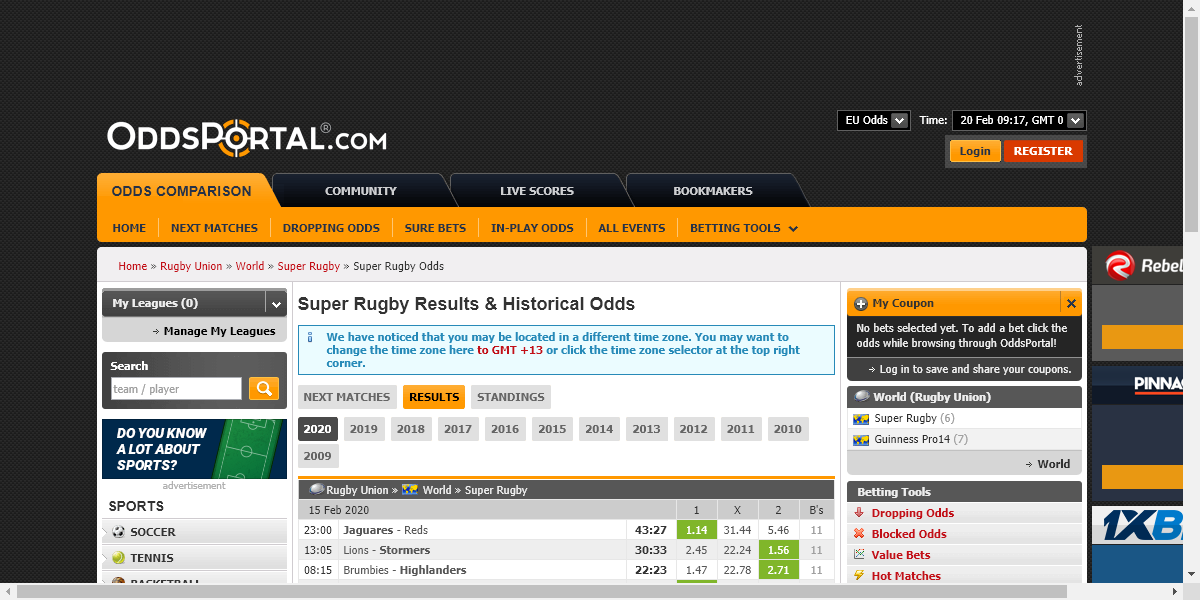

In [8]:
display(
    Image(
        driver.get_screenshot_as_png(),
        width=800,
        height=500
    )
)

In [9]:
table = driver.find_element_by_xpath('//*[@id="tournamentTable"]')

In [10]:
table.find_elements_by_xpath('//*[@id="tournamentTable"]/tbody')

[<selenium.webdriver.remote.webelement.WebElement (session="5bbfdbdabf9bbb269de0c164f537e1ae", element="7cf795ab-ba6b-4051-bafd-92cc335fb861")>]

In [11]:
table.text

"Rugby Union\n»\n World\n»\nSuper Rugby\n15 Feb 2020 1 X 2 B's\n23:00 Jaguares - Reds 43:27\n1.14\n31.44\n5.46\n11\n13:05 Lions - Stormers 30:33\n2.45\n22.24\n1.56\n11\n08:15 Brumbies - Highlanders 22:23\n1.47\n22.78\n2.71\n11\n06:05 Hurricanes - Sharks 38:22\n1.27\n22.79\n3.79\n11\n03:45 Sunwolves - Chiefs 17:43\n8.15\n38.33\n1.06\n11\n14 Feb 2020 1 X 2 B's\n08:15 Rebels - Waratahs 24:10\n1.77\n20.28\n2.12\n11\n06:05 Blues - Crusaders 8:25\n3.45\n24.23\n1.32\n11\n08 Feb 2020 1 X 2 B's\n23:00 Jaguares - Hurricanes 23:26\n1.37\n21.96\n3.07\n11\n15:15 Stormers - Bulls 13:0\n1.37\n22.14\n3.14\n11\n13:05 Lions - Reds 27:20\n1.60\n21.45\n2.37\n11\n08:15 Waratahs - Blues 12:32\n1.85\n18.44\n2.00\n11\n06:05 Chiefs - Crusaders 25:15\n2.00\n22.21\n1.83\n11\n07 Feb 2020 1 X 2 B's\n08:15 Brumbies - Rebels 39:26\n1.30\n25.50\n3.55\n11\n06:05 Highlanders - Sharks 20:42\n1.43\n23.24\n2.89\n11\n01 Feb 2020 1 X 2 B's\n23:00 Jaguares - Lions 38:8\n1.17\n27.35\n4.89\n11\n13:05 Stormers - Hurricanes 27:0

In [12]:
table_rows = table.text.split('\n')
# remove table header (first 5 lines)
table_rows = table_rows[5:]

# split list up by dates
date_idx = []
idx = 0
for row in table_rows:
    if "1 X 2 B's" in row:
        row_date = pd.to_datetime(row[:11].replace(' ','-'))
        date_idx.append(idx)
    idx += 1

In [13]:
# schema of dataframe
results = {
    'Date': [],
    'Home Score': [],
    'Away Score': []
}

# for each separate date
for i in range(len(date_idx)):
    
    # extract date
    date = table_rows[date_idx[i]]
    date = date.replace(" 1 X 2 B's", '')
    date = date.replace(' ', '-')
    
    # first match is the row after the date
    first_match = date_idx[i]+1
    
    fixtures = []
    
    if i < len(date_idx)-1:
        last_match = date_idx[i+1]
        fixtures = table_rows[first_match:last_match]
        
    else:
        fixtures = table_rows[first_match:]
        
    fixtures = np.array(fixtures).reshape(-1, 5)
    date_col = np.repeat([date], fixtures.shape[0])
    fixtures = np.hstack((date_col.reshape(-1, 1), fixtures))
    
    # add each row to dictionary
    for f in fixtures:
        
        home_score = (f[1].split()[-1].split(':')[0])
        away_score = (f[1].split()[-1].split(':')[1])
        
        results['Date'].append(pd.to_datetime(date))
        results['Home Score'].append(home_score)
        results['Away Score'].append(away_score)

# convert dictionary to dataframe
results = pd.DataFrame(results)
results = results[results['Date']>=last_week]
results = results.loc[:len(results)-1, ['Home Score', 'Away Score']]
results = results.iloc[::-1].reset_index()
results

,index,Home Score,Away Score
0,6,8,25
1,5,24,10
2,4,17,43
3,3,38,22
4,2,22,23
5,1,30,33
6,0,43,27


In [14]:
df.loc[:len(results)-1:, ['Home Score', 'Away Score']] = results.loc[:len(results)-1, ['Home Score', 'Away Score']]

In [15]:
# check results are in
df.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-02-14,Blues,Crusaders,8,25,NaN,3.47,24.74,1.31,11
1,2020-02-14,Rebels,Waratahs,24,10,NaN,1.61,20.81,2.35,11
2,2020-02-15,Sunwolves,Chiefs,17,43,NaN,9.49,40.78,1.05,11
3,2020-02-15,Hurricanes,Sharks,38,22,NaN,1.31,24.35,3.41,11
4,2020-02-15,Brumbies,Highlanders,22,23,NaN,1.44,22.14,2.78,11
5,2020-02-15,Lions,Stormers,30,33,NaN,2.62,22.26,1.50,11
6,2020-02-15,Jaguares,Reds,43,27,NaN,1.17,30.03,4.88,10
7,2020-07-02,Highlanders,Sharks,20,42,NaN,1.39,22.61,3.01,11
8,2020-07-02,Brumbies,Rebels,39,26,NaN,1.38,23.09,3.08,11
9,2020-08-02,Chiefs,Crusaders,25,15,NaN,1.98,22.72,1.83,10


In [16]:
df.to_csv('./data/super_rugby_oddsportal.csv', index=False)

---
## 2. Load upcoming Super Rugby match odds

In [17]:
driver.get( "https://www.oddsportal.com/rugby-union/world/super-rugby/")
driver.implicitly_wait(5)  # give page time to load all content

We can take a peek at what the Chromedriver sees using the `get_screenshot_as_png()` method on the driver object.

In [18]:
table = driver.find_element_by_xpath('//*[@id="tournamentTable"]')

In [19]:
# table.find_elements_by_xpath('//*[@id="tournamentTable"]/tbody/tr[7]')

In [20]:
table.text

"Rugby Union\n»\n World\n»\nSuper Rugby\nTomorrow, 21 Feb 1 X 2 B's\n06:05 Crusaders - Highlanders\n1.12\n28.51\n6.33\n11\n22 Feb 2020 1 X 2 B's\n03:45 Rebels - Sharks\n2.77\n21.98\n1.46\n11\n06:05 Chiefs - Brumbies\n1.10\n28.42\n6.56\n11\n08:15 Reds - Sunwolves\n1.13\n29.07\n5.60\n11\n13:05 Stormers - Jaguares\n1.34\n22.07\n3.25\n10\n15:15 Bulls - Blues\n2.09\n21.08\n1.77\n10"

In [21]:
table_rows = table.text.split('\n')
table_rows[:25]

['Rugby Union',
 '»',
 ' World',
 '»',
 'Super Rugby',
 "Tomorrow, 21 Feb 1 X 2 B's",
 '06:05 Crusaders - Highlanders',
 '1.12',
 '28.51',
 '6.33',
 '11',
 "22 Feb 2020 1 X 2 B's",
 '03:45 Rebels - Sharks',
 '2.77',
 '21.98',
 '1.46',
 '11',
 '06:05 Chiefs - Brumbies',
 '1.10',
 '28.42',
 '6.56',
 '11',
 '08:15 Reds - Sunwolves',
 '1.13',
 '29.07']

In [22]:
# remove table header (first 5 lines)
table_rows = table_rows[5:]

In [23]:
# split list up by dates
date_idx = []
idx = 0
for row in table_rows:
    if "1 X 2 B's" in row:
        print(row)
        date_idx.append(idx)
    idx += 1

Tomorrow, 21 Feb 1 X 2 B's
22 Feb 2020 1 X 2 B's


In [24]:
date_idx

[0, 6]

In [25]:
# schema of dataframe
df = {
    'Date': [],
    'Home Team': [],
    'Away Team': [],
    'Home Score': [],
    'Away Score': [],
    'Play-off Game?': [],
    'Home Odds': [],
    'Draw Odds': [],
    'Away Odds': [],
    'Bookmakers Surveyed': []
}

# for each separate date
for i in range(len(date_idx)):
    
    # extract date
    date = table_rows[date_idx[i]]
    date = date.replace(" 1 X 2 B's", '')
    
    # remove unnecessary text
    if 'Tomorrow' in date or 'Today' in date:
        date = date[date.find(',')+2: ] + ' ' + str(datetime.datetime.now().year)
        
    date = date.replace(' ', '-')
    
    first_match = date_idx[i]+1
    
    fixtures = []
    
    if i < len(date_idx)-1:
        last_match = date_idx[i+1]
        fixtures = table_rows[first_match:last_match]
        
    else:
        fixtures = table_rows[first_match:]
        
    fixtures = np.array(fixtures).reshape(-1, 5)
    date_col = np.repeat([date], fixtures.shape[0])
    fixtures = np.hstack((date_col.reshape(-1, 1), fixtures))
    
    # add each row to dictionary
    for f in fixtures:
        df['Date'].append(pd.to_datetime(f[0]))
        df['Home Team'].append(f[1])
        df['Away Team'].append(f[1])
        df['Home Score'].append(0)
        df['Away Score'].append(0)
        df['Play-off Game?'].append('')
        df['Home Odds'].append(f[2])
        df['Draw Odds'].append(f[3])
        df['Away Odds'].append(f[4])
        df['Bookmakers Surveyed'].append(f[-1])

# convert dictionary to dataframe
df = pd.DataFrame(df)
df.head(7)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-02-21,06:05 Crusaders - Highlanders,06:05 Crusaders - Highlanders,0,0,,1.12,28.51,6.33,11
1,2020-02-22,03:45 Rebels - Sharks,03:45 Rebels - Sharks,0,0,,2.77,21.98,1.46,11
2,2020-02-22,06:05 Chiefs - Brumbies,06:05 Chiefs - Brumbies,0,0,,1.10,28.42,6.56,11
3,2020-02-22,08:15 Reds - Sunwolves,08:15 Reds - Sunwolves,0,0,,1.13,29.07,5.60,11
4,2020-02-22,13:05 Stormers - Jaguares,13:05 Stormers - Jaguares,0,0,,1.34,22.07,3.25,10
5,2020-02-22,15:15 Bulls - Blues,15:15 Bulls - Blues,0,0,,2.09,21.08,1.77,10


In [26]:
def get_home(s):
    '''find the text between the kick-off time and the dash'''
    return re.search(r'[0-2][0-9]:[0-6][0-9](.*?)-', s).group(1).strip()

def get_away(s):
    '''find the last word of text'''
    return s.split()[-1]

def convert(odds):
    try: 
        output = float(odds)
    
    except:
        nom = int(odds.split("/")[0])
        dem = int(odds.split("/")[1])
        output = (nom/dem)+1
    return output

print(get_home('06:05 Blues - Chiefs'))
print(get_away('06:05 Blues - Chiefs'))

Blues
Chiefs


In [27]:
df['Home Team'] = df['Home Team'].apply(get_home)
df['Away Team'] = df['Away Team'].apply(get_away)

df['Home Odds'] = df['Home Odds'].apply(convert)
df['Away Odds'] = df['Away Odds'].apply(convert)
df['Draw Odds'] = df['Draw Odds'].apply(convert)

df.head(7)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-02-21,Crusaders,Highlanders,0,0,,1.12,28.51,6.33,11
1,2020-02-22,Rebels,Sharks,0,0,,2.77,21.98,1.46,11
2,2020-02-22,Chiefs,Brumbies,0,0,,1.10,28.42,6.56,11
3,2020-02-22,Reds,Sunwolves,0,0,,1.13,29.07,5.60,11
4,2020-02-22,Stormers,Jaguares,0,0,,1.34,22.07,3.25,10
5,2020-02-22,Bulls,Blues,0,0,,2.09,21.08,1.77,10


## Fetch Existing Dataset

In [28]:
# read in existing data
existing_dataset = pd.read_csv('./data/super_rugby_oddsportal.csv')

# replace NaNs with empty strings
existing_dataset.fillna('', inplace=True)

existing_dataset.head()

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-02-14,Blues,Crusaders,8,25,,3.47,24.74,1.31,11
1,2020-02-14,Rebels,Waratahs,24,10,,1.61,20.81,2.35,11
2,2020-02-15,Sunwolves,Chiefs,17,43,,9.49,40.78,1.05,11
3,2020-02-15,Hurricanes,Sharks,38,22,,1.31,24.35,3.41,11
4,2020-02-15,Brumbies,Highlanders,22,23,,1.44,22.14,2.78,11


## Add Scraped Odds to Existing Dataset

In [29]:
# add new odds to existing
combined_df = pd.concat([df, existing_dataset], ignore_index=True)

In [30]:
combined_df.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-02-21 00:00:00,Crusaders,Highlanders,0,0,,1.12,28.51,6.33,11
1,2020-02-22 00:00:00,Rebels,Sharks,0,0,,2.77,21.98,1.46,11
2,2020-02-22 00:00:00,Chiefs,Brumbies,0,0,,1.10,28.42,6.56,11
3,2020-02-22 00:00:00,Reds,Sunwolves,0,0,,1.13,29.07,5.60,11
4,2020-02-22 00:00:00,Stormers,Jaguares,0,0,,1.34,22.07,3.25,10
5,2020-02-22 00:00:00,Bulls,Blues,0,0,,2.09,21.08,1.77,10
6,2020-02-14,Blues,Crusaders,8,25,,3.47,24.74,1.31,11
7,2020-02-14,Rebels,Waratahs,24,10,,1.61,20.81,2.35,11
8,2020-02-15,Sunwolves,Chiefs,17,43,,9.49,40.78,1.05,11
9,2020-02-15,Hurricanes,Sharks,38,22,,1.31,24.35,3.41,11


In [31]:
combined_df.shape

(1372, 10)

## Save Updated Dataset to CSV

In [32]:
combined_df.to_csv('./data/super_rugby_oddsportal.csv', index=False)